In [95]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import datetime as dt
import time

In [20]:
data1 = pd.read_csv('../raw_data/24-09-22_to_24-12-23.csv', lineterminator='\n')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39513 entries, 0 to 39512
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   datetime  39513 non-null  object
 1   username  39513 non-null  object
     39513 non-null  object
dtypes: object(3)
memory usage: 926.2+ KB


In [23]:
data1['datetime'] = pd.to_datetime(data1['datetime'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39513 entries, 0 to 39512
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype              
---  ------    --------------  -----              
 0   datetime  39513 non-null  datetime64[ns, UTC]
 1   username  39513 non-null  object             
     39513 non-null  object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 926.2+ KB


In [107]:
data1['datetime'].dt.date

0        2022-09-24
1        2022-09-24
2        2022-09-24
3        2022-09-24
4        2022-09-24
            ...    
39508    2022-12-23
39509    2022-12-23
39510    2022-12-23
39511    2022-12-23
39512    2022-12-23
Name: datetime, Length: 39513, dtype: object

In [130]:
def return_tweet_volume_scraped_data(data1 )
    start = time.time()
    i=1
    first_time = data1['datetime'][0]
    data1['tweet_per_10_mins'] = 0
    data1['segment_tweets'] = 0
    hour = data1['datetime'].dt.hour[0]
    for index, datetime in enumerate(data1['datetime']):
        if data1['datetime'].dt.hour[index] != hour:
            if i == 150:
                prev_ind = index-1
                data1['tweet_per_10_mins'][prev_ind] = 600*i/((first_time - last_time).total_seconds())
                i = 0
                first_time = data1['datetime'][index]
            else:
                prev_ind = index-1
                data1['tweet_per_10_mins'][prev_ind] = i
                i = 0
                first_time = data1['datetime'][index]
        else: 
            pass
        data1['segment_tweets'][index] = i
        i = i + 1
        hour = data1['datetime'].dt.hour[index]
        last_time = data1['datetime'][index]

    data2 = data1.groupby(by = 'date').sum()
    data2['tweets_per_day'] = data2['tweet_per_10_mins']*48
    end = time.time()
    print(end - start)
return data2


/tmp/ipykernel_6167/1909231297.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['segment_tweets'][index] = i
/tmp/ipykernel_6167/1909231297.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['tweet_per_10_mins'][prev_ind] = i
/tmp/ipykernel_6167/1909231297.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['tweet_per_10_mins'][prev_ind] = 600*i/((first_time - last_time).total_seconds())


240.08696579933167


/tmp/ipykernel_6167/1909231297.py:26: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = data1.groupby(by = 'date').sum()


In [132]:
data2

,daily_rate,tweet_ps,tweets_per_10_mins,tweet_per_10_mins,segment_tweets,tweets_per_day
date,,,,,,
2022-09-24,0.183639,110,0,376.639175,23386,18078.680412
2022-09-25,0.000000,0,0,344.000000,20303,16512.000000
2022-09-26,0.000000,0,0,439.812062,29731,21110.978962
2022-09-27,0.000000,0,0,526.696379,30106,25281.426184
2022-09-28,0.000000,0,0,478.721992,32349,22978.655602
...,...,...,...,...,...,...
2022-12-19,0.000000,0,0,483.065432,33081,23187.140752
2022-12-20,0.000000,0,0,441.358595,29974,21185.212569
2022-12-21,0.000000,0,0,447.988479,29253,21503.447014


<Axes: xlabel='date', ylabel='tweets_per_day'>

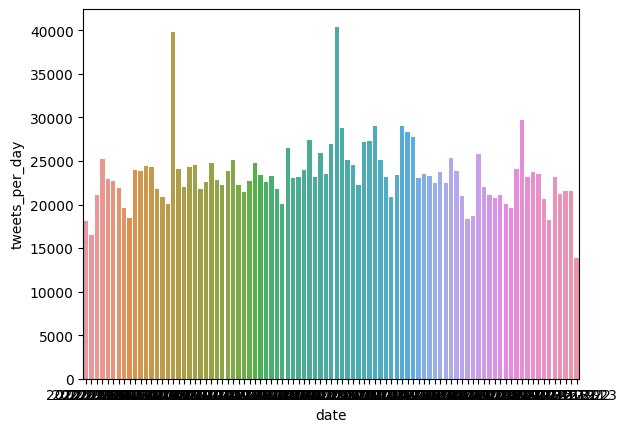

In [131]:
sns.barplot(data=data2, x=data2.index, y='tweets_per_day' )